# Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

# Data preprocessing

## Data renaming

In [2]:
# Function to rename multiple files 

def main(): 
  
    for count, filename in enumerate(os.listdir('../Plant_leave_diseases_dataset_with_augmentation/Apple_Apple_scab')): 
        root = '../Plant_leave_diseases_dataset_with_augmentation/Apple_Apple_scab'
        src = root +'/'+ filename 
        dst =root + "/scab" + str(count) + ".jpg"
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 

# Driver Code 
if __name__ == '__main__':
    
#calling the function
    main()

## Train, valid, test

In [3]:
#proportions
print(0.77*1001)
print(0.15*1001)
print(0.08*1001)

770.77
150.15
80.08


In [4]:
# Organize data into train, valid, test folder randomly from the whole data

os.chdir('../PlantVillageTest_apples')
if os.path.isdir('train/healthy') is False:
    os.makedirs('train/healthy')
    os.makedirs('train/scab')
    os.makedirs('train/rot')
    os.makedirs('train/rust')
    
    os.makedirs('valid/healthy')
    os.makedirs('valid/scab')
    os.makedirs('valid/rot')
    os.makedirs('valid/rust')
    
    os.makedirs('test/healthy')
    os.makedirs('test/scab')
    os.makedirs('test/rot')
    os.makedirs('test/rust')

    for i in random.sample(glob.glob('Apple_healthy/healthy*'), 770):
        shutil.move(i, 'train/healthy')      
    for i in random.sample(glob.glob('Apple_Apple_scab/scab*'), 770):
        shutil.move(i, 'train/scab')
    for i in random.sample(glob.glob('Apple_Black_rot/rot*'), 770):
        shutil.move(i, 'train/rot')
    for i in random.sample(glob.glob('Apple_Cedar_apple_rust/rust*'), 770):
        shutil.move(i, 'train/rust')
        
    for i in random.sample(glob.glob('Apple_healthy/healthy*'), 150):
        shutil.move(i, 'valid/healthy')        
    for i in random.sample(glob.glob('Apple_Apple_scab/scab*'), 150):
        shutil.move(i, 'valid/scab')
    for i in random.sample(glob.glob('Apple_Black_rot/rot*'), 150):
        shutil.move(i, 'valid/rot')
    for i in random.sample(glob.glob('Apple_Cedar_apple_rust/rust*'), 150):
        shutil.move(i, 'valid/rust')
        
    for i in random.sample(glob.glob('Apple_healthy/healthy*'), 80):
        shutil.move(i, 'test/healthy')      
    for i in random.sample(glob.glob('Apple_Apple_scab/scab*'), 80):
        shutil.move(i, 'test/scab')
    for i in random.sample(glob.glob('Apple_Black_rot/rot*'), 80):
        shutil.move(i, 'test/rot')
    for i in random.sample(glob.glob('Apple_Cedar_apple_rust/rust*'), 80):
        shutil.move(i, 'test/rust')

os.chdir('../../')

## Batches

In [24]:
# we need the paths (relative wasn't working so absolute we go)

train_path = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/PlantVillageTest_apples/train'
valid_path = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/PlantVillageTest_apples/valid'
test_path = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/PlantVillageTest_apples/test'

In [25]:
# puting the data in the format of a Keras generator

'''Necessary to define the size of the images so they are all the same, it can be different
batch_size can be different too I guess'''

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['healthy', 'rot', 'rust', 'scab'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['healthy', 'rot', 'rust', 'scab'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['healthy', 'rot', 'rust', 'scab'], batch_size=10, shuffle=False)

#shuffle = False for test since we need to access the unshuffled data and by default it gets shuffled

Found 3080 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


## Visualise data

In [7]:
# grab a single batch of images and labels

imgs, labels = next(train_batches)

In [8]:
# this function will plot images in the form of a grid with the 1 row and 10 columns where the images are placed
# from the tensor flow website

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

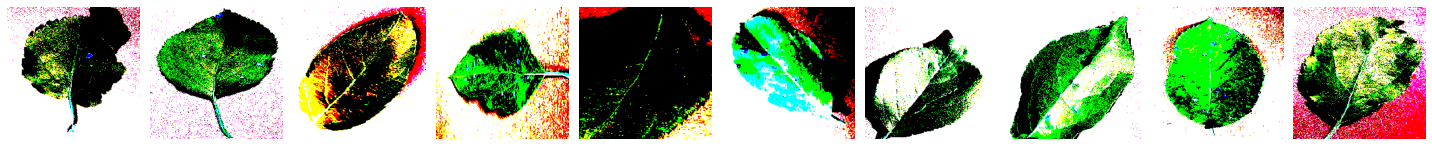

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [9]:
# it will print the BATCH
# the colours might look weird do to the preprocessing
plotImages(imgs)
print(labels)

# Model

In [10]:
# importing the model

vgg16_model = tf.keras.applications.vgg16.VGG16()

In [11]:
'''we have replicated the entire vgg16_model (excluding the output layer) 
to a new Sequential model (adding the layers one by one)'''

modelApples = Sequential()
for layer in vgg16_model.layers[:-1]:
    modelApples.add(layer)

In [12]:
# freezing the weights of what was imported from VGG16

for layer in modelApples.layers:
    layer.trainable = False

In [13]:
# we add the output layer that will identify healthy and the 3 diseases 
# (rot, scab,rust)

modelApples.add(Dense(units=4, activation='softmax'))

In [15]:
# optimise the data

modelApples.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

In [16]:
#fitting the model to our data

modelApples.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Train for 308 steps, validate for 60 steps
Epoch 1/5
308/308 - 1022s - loss: 0.6351 - accuracy: 0.7721 - val_loss: 0.3150 - val_accuracy: 0.9183
Epoch 2/5
308/308 - 1007s - loss: 0.2214 - accuracy: 0.9403 - val_loss: 0.2151 - val_accuracy: 0.9467
Epoch 3/5
308/308 - 1002s - loss: 0.1528 - accuracy: 0.9623 - val_loss: 0.1660 - val_accuracy: 0.9617
Epoch 4/5
308/308 - 1311s - loss: 0.1184 - accuracy: 0.9701 - val_loss: 0.1417 - val_accuracy: 0.9650
Epoch 5/5
308/308 - 1038s - loss: 0.0970 - accuracy: 0.9769 - val_loss: 0.1263 - val_accuracy: 0.9717


# Predictions + confusion matrix

In [18]:
predictions = modelApples.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [19]:
'''NOT SURE IT'LL WORK'''

# directly from scikit-learn a function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
# so we know how to pass the classes later when we want to plot it

test_batches.class_indices

{'healthy': 0, 'rot': 1, 'rust': 2, 'scab': 3}

Confusion matrix, without normalization
[[78  1  0  1]
 [ 0 80  0  0]
 [ 0  1 79  0]
 [ 2  2  0 76]]


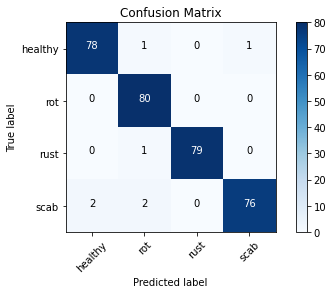

In [22]:
# we are using the confusion matrix creator function that we ran for the simpler model

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

# assigning the right labels and then plotting it

cm_plot_labels = ['healthy','rot','rust','scab']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Saving the model

In [1]:
# saving the model

modelApples.save('modelApples.h5')

NameError: name 'modelApples' is not defined

In [26]:
# loading it back

apples_model = keras.models.load_model('modelApples')

## option 2

In [13]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [16]:
# Save the model
filepath = 'modelApples'
#save_model(modelApples, filepath)

In [17]:
# Load the model
apples_model = load_model(filepath, compile = True)

In [ ]:
# both seem to work well

## Fiting again (adding epochs)

In [27]:
#fitting the model to our data

apples_model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Train for 308 steps, validate for 60 steps
Epoch 1/10
308/308 - 1055s - loss: 0.0843 - accuracy: 0.9792 - val_loss: 0.1127 - val_accuracy: 0.9650
Epoch 2/10
308/308 - 1047s - loss: 0.0669 - accuracy: 0.9844 - val_loss: 0.1062 - val_accuracy: 0.9683
Epoch 3/10
308/308 - 1050s - loss: 0.0580 - accuracy: 0.9844 - val_loss: 0.0973 - val_accuracy: 0.9667
Epoch 4/10
308/308 - 1055s - loss: 0.0471 - accuracy: 0.9922 - val_loss: 0.1075 - val_accuracy: 0.9583
Epoch 5/10
308/308 - 1053s - loss: 0.0423 - accuracy: 0.9916 - val_loss: 0.0952 - val_accuracy: 0.9667
Epoch 6/10
308/308 - 1052s - loss: 0.0362 - accuracy: 0.9932 - val_loss: 0.0898 - val_accuracy: 0.9667
Epoch 7/10
308/308 - 1051s - loss: 0.0323 - accuracy: 0.9958 - val_loss: 0.0907 - val_accuracy: 0.9633
Epoch 8/10
308/308 - 1053s - loss: 0.0293 - accuracy: 0.9948 - val_loss: 0.0810 - val_accuracy: 0.9683
Epoch 9/10
308/308 - 1056s - loss: 0.0258 - accuracy: 0.9968 - val_loss: 0.0778 - val_accuracy: 0.9733
Epoch 10/10
308/308 - 1049s - 

In [29]:
# and saving again

apples_model.save('modelApples_2.h5')
apples_model.save('modelApples_2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: modelApples_2/assets
